# Assignment 4:  Web Scraping Exercise

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

We are going to retrieve a list of all the CORGIS CSV Datasets.  To do this, include the following steps in the cell below:
* Import requests and BeautifulSoup
* Use `requests.get` to retrieve the html code of the CORGIS [CSV Datasets](https://corgis-edu.github.io/corgis/csv/) webpage
* Use `BeautifulSoup` to parse the html and create a list containing all occurrences of the "h3" html tag
  * Look at the page source of the above link to identify why it makes sense to search for the \<h3\> tags in the page
* Using the list of h3 tags, make a Python list of all the dataset names and store it in the variable `corgis_list`.  
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [4]:
import requests
from bs4 import BeautifulSoup

#Retrieve html code from CORGIS
url = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(url)
html_content = response.text

#Parse the html and create a list
soup = BeautifulSoup(html_content, 'html.parser')
h3_tags = soup.find_all('h3')

#Make list of all dataset names
corgis_list = [tag.get_text() for tag in h3_tags]

print(' '.join(corgis_list))


Aids Airlines Astronauts Billionaires Broadway Business Dynamics Cancer Cars Classics Coffee Construction Permits Construction Spending Consumer Price Index County Demographics Covid Covid Behaviors Covid Mobility Drugs Earthquakes Election Electricity Emissions Energy Finance Food Food Access Global Development Global Emissions Graduates Health Hospitals Hydropower Ingredients Injuries Labor Medal Of Honor Monkeypox Music Nuclear Explosions Opioids Parking Citations Police Shootings Publishers Real Estate Retail Services School Scores Skyscrapers Slavery Smoking State Crime State Demographics State Fragility Suicide Attacks Super Bowl Ads Supreme Court Tate Ufo Sightings Video Games Weather Wind Turbines


Write a function that takes an element from `corgis_list`, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If you define a function `pdcorgis` and want to call it with Python code like `classics_data = pdcorgis(corgis_list[0])`, then an example set of Python commands inside the function could be:
  1. Convert the dataset name to lowercase [Note that `a.lower()` will give a lowercase version of the string `a`]
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" 
  1. Use `BeautifulSoup` to find all the HTML links on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), test whether `i.has_attr('download')` is true or false; if it is true, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a `return` statement to return the dataframe from your function.  [For example, if I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function]
    

In [31]:
import pandas as pd

#Takes in name of dataset and returns a Pandas dataframe
def pdcorgis(dataset_name):

    #Convert to lowercase and add _ to needed datasets
    dataset_name_lower = dataset_name.lower().replace(' ', '_')
    # print(dataset_name_lower)
    
    #Get HTML from CORGIS page
    dataset_url = f"https://corgis-edu.github.io/corgis/csv/{dataset_name_lower}/"
    dataset_response = requests.get(dataset_url)
    dataset_html_content = dataset_response.text

    #Parse the HTML and find links
    dataset_soup = BeautifulSoup(dataset_html_content, 'html.parser')
    links = dataset_soup.find_all('a')

    #Find download link
    download_link = None
    for link in links:
        if link.has_attr('download'):
            download_link = link['href']
            break

    if download_link is None:
        raise ValueError("Download link for {dataset_name} not found")
    
    #Get link to use for csv
    csv_url = f"https://corgis-edu.github.io/corgis/csv/{dataset_name_lower}/{download_link}"

    #Read the csv file into Pandas
    corgis_dataframe = pd.read_csv(csv_url)

    return corgis_dataframe

Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [35]:
#Make sure function works
pdcorgis(corgis_list[11]).head()

,time.index,time.month,time.month name,time.period,time.year,annual.combined.amusement and recreation,annual.combined.commercial,annual.combined.communication,annual.combined.conservation and development,annual.combined.educational,...,current.public.nonresidential,current.public.office,current.public.power,current.public.public safety,current.public.religious,current.public.residential,current.public.sewage and waste disposal,current.public.total construction,current.public.transportation,current.public.water supply
0,1,1,Jan,Jan2002,2002,17866,68254,18873,3603,72357,...,13844,697,273,637,0,400,1127,14243,1285,826
1,2,2,Feb,Feb2002,2002,18317,65840,19943,3712,74336,...,13691,661,284,640,0,423,1119,14113,1318,851
2,3,3,Mar,Mar2002,2002,17988,66722,19092,3332,72247,...,13967,728,222,626,0,420,1182,14386,1452,865
3,4,4,Apr,Apr2002,2002,17264,64879,19150,3076,74553,...,15791,798,369,638,0,430,1272,16221,1479,967
4,5,5,May,May2002,2002,16988,62741,18735,3199,75577,...,17937,864,388,654,0,438,1417,18375,1652,1082


Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

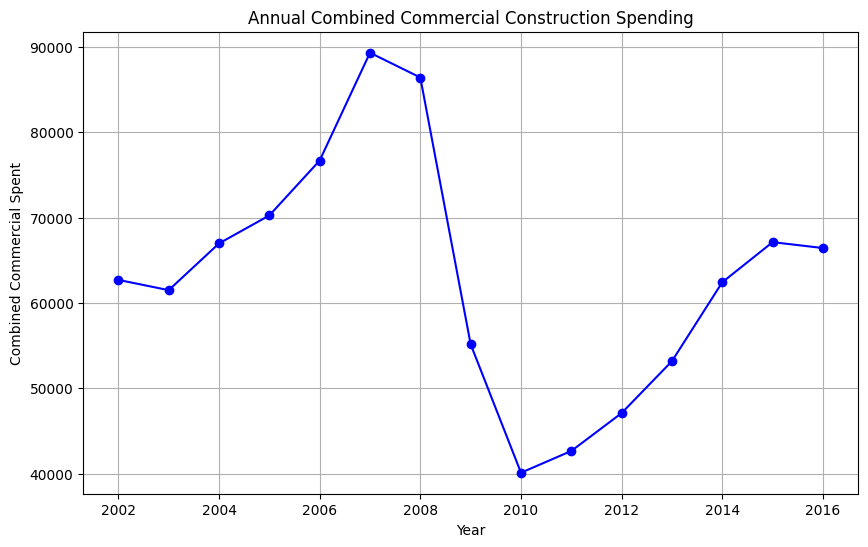

In [108]:
import matplotlib.pyplot as plt
#Line Plot for Comparison Over Time
#Construction Spending

#Get Dataset
construction_data = pdcorgis(corgis_list[11])
# construction_data.head()

#Get Year
construction_year = construction_data['time.year']

#Get the annual commercial spending 
construction_combined_commercial = construction_data['annual.combined.commercial']

#Put in one dataframe
construction_new_data = pd.DataFrame({'Year': construction_year, 'Combined Commercial': construction_combined_commercial})

#Group by year and get mean to get one plot point for year instead of 12 points on the same x-axis line
construction_year_mean = construction_new_data.groupby('Year').mean().reset_index()
# print(construction_year_mean)

#Line Plot
plt.figure(figsize=(10, 6))
plt.plot(construction_year_mean['Year'], construction_year_mean['Combined Commercial'], marker='o', linestyle='-', color='b')
plt.title('Annual Combined Commercial Construction Spending')
plt.xlabel('Year')
plt.ylabel('Combined Commercial Spent')
plt.grid(True)
plt.show()

In [1]:
#Bar Plot for Comparison Amoung Items Few Items
#Election Data
print("I don't know where the list it is printing is coming from. :|")

#Get Dataset
coffee_data = pdcorgis(corgis_list[9])
# coffee_data.head()

#Get Country
coffee_location = coffee_data['Location.Country']
# print(coffee_location)

#Get Score Total
flavor_score = coffee_data['Data.Scores.Total']
# print(flavor_score)

#Put in one dataframe
coffee_new_data = pd.DataFrame({'Country': coffee_location, 'Total Flavor Score': flavor_score})

#Bar Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(coffee_new_data['Country'], coffee_new_data['Total Flavor Score'], color=['darkgreen'])
plt.title('Total Flavor Score of Coffee by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Total Flavor Score') 
plt.ylim(70, coffee_new_data['Total Flavor Score'].max() + 5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xticks(rotation=75)

I don't know where the list it is printing is coming from. :|


NameError: name 'pdcorgis' is not defined

Text(0.5, 1.0, 'Distribution of Age(Greater than 18) of Billionaires in 2014')

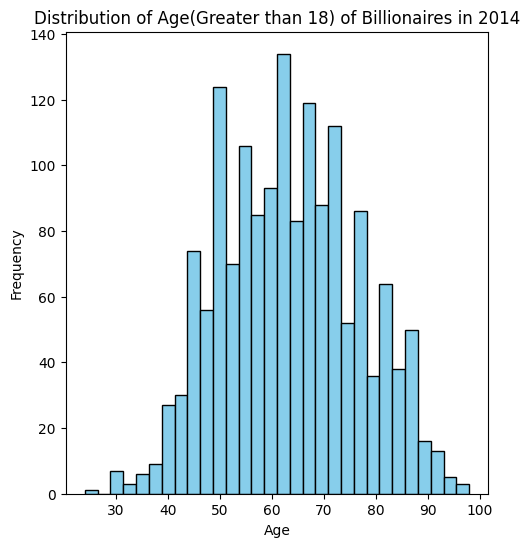

In [111]:
#Histogram Plot for Distribution
#Age distribution Billionaires

#Get Dataset
billionaires_data = pdcorgis(corgis_list[3])
# billionaires_data.head(20)

#Get Years data is available 
billionaires_year = billionaires_data['year']
# print(billionaires_year)

#Get Data from latest year
billionaires_year_2014 = billionaires_data[billionaires_data['year'] == 2014]
# print(billionaires_year_2014)

#Get Data for age and filter
billionaires_age = billionaires_year_2014['demographics.age']
billionaires_age_greater_than_18 = billionaires_age[(billionaires_age >= 18) & (billionaires_age.notna())]

# Plot histogram for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(billionaires_age_greater_than_18, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age(Greater than 18) of Billionaires in 2014')


# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top